In [164]:
import pandas as pd

In [165]:
data = pd.read_csv('C:/Users/pc/Chap4.Machine Learning/고우주-3일차/09_실습데이터/data/winequalityN_imblance.csv')

In [166]:
data.head(5)

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_range
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6487 non-null   float64
 2   volatile_acidity      6489 non-null   float64
 3   citric_acid           6494 non-null   float64
 4   residual_sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality_range         6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [168]:
data.shape

(6497, 13)

In [169]:
! pip install missingno

# 결측치 확인

<AxesSubplot:>

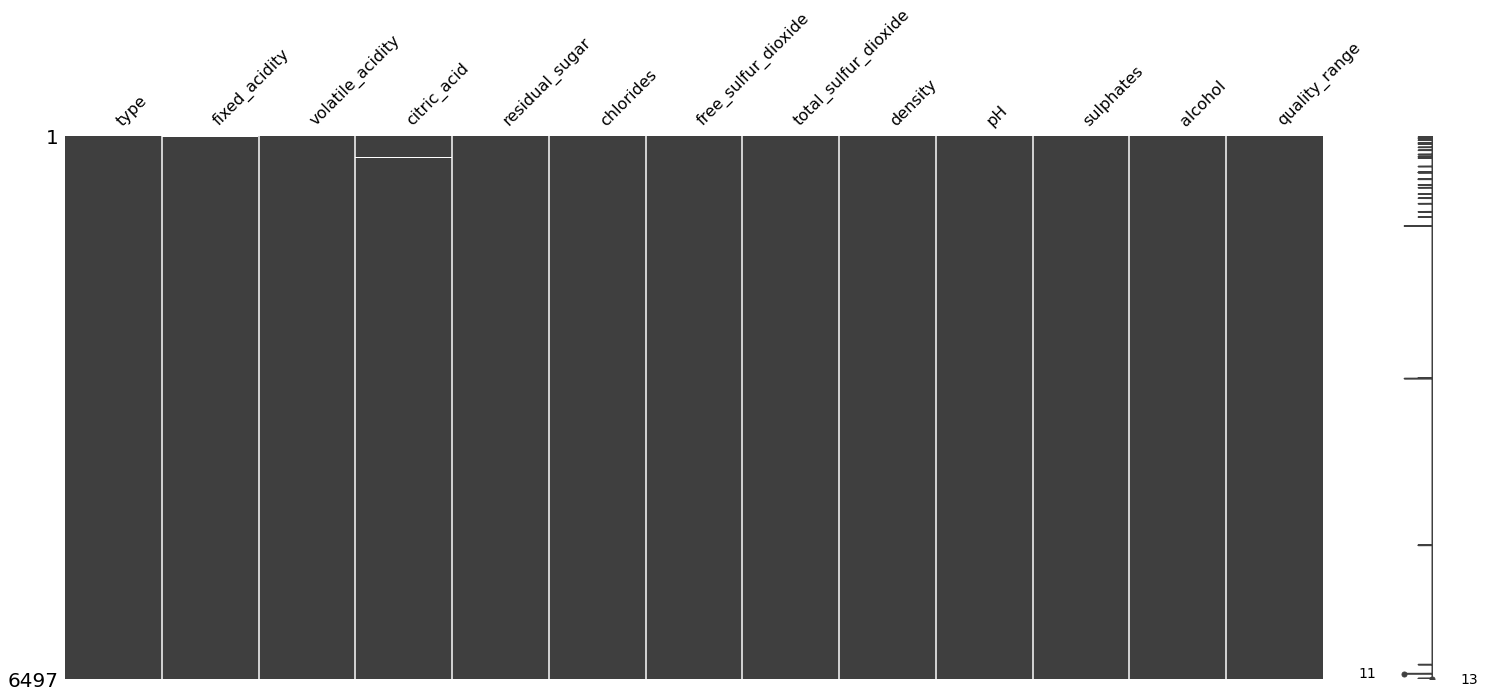

In [170]:
import missingno as msno

msno.matrix(data)



In [171]:
for c in data.columns:
    print('{} : {}'.format(c, len(data.loc[pd.isnull(data[c]), c].values)))

type : 0
fixed_acidity : 10
volatile_acidity : 8
citric_acid : 3
residual_sugar : 2
chlorides : 2
free_sulfur_dioxide : 0
total_sulfur_dioxide : 0
density : 0
pH : 9
sulphates : 4
alcohol : 0
quality_range : 0


In [172]:
data.dropna(axis=0, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed_acidity         6463 non-null   float64
 2   volatile_acidity      6463 non-null   float64
 3   citric_acid           6463 non-null   float64
 4   residual_sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free_sulfur_dioxide   6463 non-null   float64
 7   total_sulfur_dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality_range         6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


<AxesSubplot:>

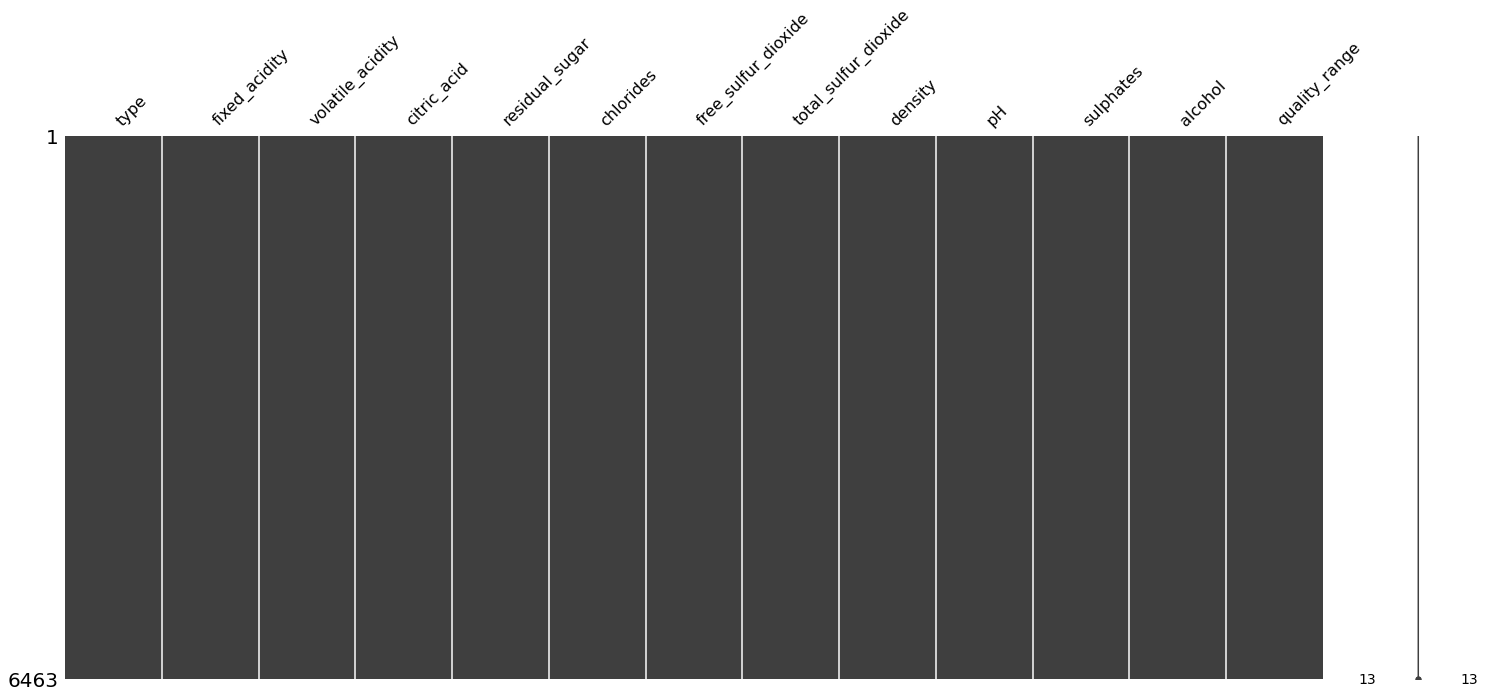

In [173]:
msno.matrix(data)


In [174]:
data.columns

Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality_range'],
      dtype='object')

In [175]:
X = data[['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

In [176]:
y = data.quality_range
print(type(y))
print(y.shape)
y.head(5)

<class 'pandas.core.series.Series'>
(6463,)


0    1
1    1
2    1
3    1
4    1
Name: quality_range, dtype: int64

In [177]:
y = data['quality_range']

In [178]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 123)

In [179]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4847, 11)
(4847,)
(1616, 11)
(1616,)


In [180]:
# make an instance of a k-NN classifier object
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
type(knn)

sklearn.neighbors._classification.KNeighborsClassifier

In [181]:
print(knn)

KNeighborsClassifier(n_neighbors=3)


In [182]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [183]:
y_pred = knn.predict(X_test)

In [184]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [185]:
# calculate classification accuracy
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)

In [186]:
print(accuracy)
print(cm)

0.963490099009901
[[   5   52]
 [   7 1552]]


In [187]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
X_train_std

array([[ 0.29330945,  0.12028617,  0.85868016, ..., -0.6150771 ,
        -0.67644796, -0.25230235],
       [ 0.601949  , -0.49239466,  0.29742973, ..., -0.80233159,
         1.2512861 ,  0.91402896],
       [ 3.53402473, -0.67619891,  0.43774233, ..., -1.80102219,
         0.1212351 , -0.66884925],
       ...,
       [ 0.29330945, -0.36985849,  0.50789864, ...,  0.19635901,
        -0.87586873, -0.08568359],
       [-0.55544931, -0.24732233, -0.33397701, ..., -0.1157318 ,
         0.45360304,  1.74712275],
       [-0.16964987, -1.10507549, -0.47428961, ..., -1.92585852,
        -0.4770272 , -1.08539614]])

In [188]:
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

In [189]:
y_pred = knn.predict(X_test_std)

In [190]:
accuracy = metrics.accuracy_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)

In [191]:
print(accuracy)
print(cm)

0.9603960396039604
[[   7   50]
 [  14 1545]]


In [195]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [196]:
X_train_norm

array([[0.30833333, 0.224     , 0.35772358, ..., 0.33898305, 0.11931818,
        0.31884058],
       [0.34166667, 0.144     , 0.29268293, ..., 0.31355932, 0.28409091,
        0.52173913],
       [0.65833333, 0.12      , 0.30894309, ..., 0.1779661 , 0.1875    ,
        0.24637681],
       ...,
       [0.30833333, 0.16      , 0.31707317, ..., 0.44915254, 0.10227273,
        0.34782609],
       [0.21666667, 0.176     , 0.2195122 , ..., 0.40677966, 0.21590909,
        0.66666667],
       [0.25833333, 0.064     , 0.20325203, ..., 0.16101695, 0.13636364,
        0.17391304]])

In [197]:
knn.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=3)

In [198]:
y_pred = knn.predict(X_test_std)

In [199]:
accuracy = metrics.accuracy_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)

In [200]:
print(accuracy)
print(cm)

0.875
[[  13   44]
 [ 158 1401]]


In [201]:
# Because all variables in iris dataset are numerical, we use Gaussian naive Bayes.
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_2 = gnb.predict(X_test)

In [202]:
accuracy = metrics.accuracy_score(y_test, y_pred_2)
cm = metrics.confusion_matrix(y_test, y_pred_2)

print(accuracy)
print(cm)

0.9306930693069307
[[  11   46]
 [  66 1493]]
